## Preprocess Data

In [52]:
#https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

In [470]:
import pandas as pd
import numpy as np

In [471]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [472]:
import_df = pd.read_csv('gamma.csv')
import_df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fMLong,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [473]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [474]:
X = import_df.iloc[:,:-1]
y = import_df.iloc[:,-1]

X_scaled = scaler.fit_transform(X)

In [475]:
X.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fMLong,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [476]:
y.head()

0    g
1    g
2    g
3    g
4    g
Name: class, dtype: object

In [353]:
gamma_df = X.copy()
gamma_df['Label'] = import_df['class'].map({'g':1,'h':0})
gamma_df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fMLong,fM3Trans,fAlpha,fDist,Label
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


## Clustering

#### K-means

In [354]:
new_rows = list(gamma_df.columns[:-1])
new_rows

['fLength',
 'fWidth',
 'fSize',
 'fConc',
 'fConc1',
 'fAsym',
 'fMLong',
 'fM3Trans',
 'fAlpha',
 'fDist']

In [355]:
from sklearn.cluster import KMeans

In [356]:
kmeans_dict = {}
cluster_distances = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    gamma_df[f'{k}-means Label'] = kmeans.labels_
    
    plot_df = pd.DataFrame(index=new_rows, columns=[f'Label {k_}' for k_ in range(k)])
    for n in range(k):
        for m in range(len(new_rows)):
            plot_df.iloc[m,n] = gamma_df[gamma_df[f'{k}-means Label'] == n].iloc[:,m+1].mean()
    kmeans_dict[k] = plot_df
    
    cluster_distances.append(np.amin(kmeans.transform(X_scaled), axis=1).sum())
    

In [357]:
cluster_distances

[44659.044807282,
 41591.9545566714,
 38593.63966926113,
 37688.79432440078,
 35957.57837509575,
 34710.47004172279,
 33538.265258085274,
 32962.67809305607,
 32239.493047846438]

In [361]:
k_distance = pd.DataFrame()
k_distance['Cluster Distances'] = cluster_distances
k_distance['K-means'] = range(2,11)
k_distance.index = k_distance['K-means']
k_distance.drop('K-means', axis=1)

,Cluster Distances
K-means,
2,44659.044807
3,41591.954557
4,38593.639669
5,37688.794324
6,35957.578375
7,34710.470042
8,33538.265258
9,32962.678093
10,32239.493048


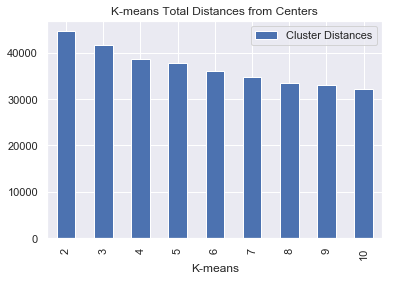

In [359]:
k_distance.plot.bar(x='K-means', title='K-means Total Distances from Centers')

In [15]:
kmeans_dict[4]

,Label 0,Label 1,Label 2,Label 3
fLength,17.8999,69.669,31.9379,10.8714
fWidth,2.76208,3.53535,3.33925,2.37465
fSize,0.342514,0.183119,0.205143,0.605844
fConc,0.18932,0.102911,0.113399,0.349323
fConc1,6.49981,-102.877,-6.10379,2.4344
fAsym,6.45084,-100.715,57.979,3.04204
fMLong,-0.0224605,2.77168,0.245882,0.107049
fM3Trans,22.6851,44.6164,13.7501,41.5123
fAlpha,172.471,262.774,257.583,160.491
fDist,0.723146,0.028133,0.72366,0.616248


In [16]:
def plot_kmeans_avg_values(k):
    fig, ax = plt.subplots(2,5, figsize=(12,7), constrained_layout=True)
    #fig.suptitle('Average Feature Value by Label', fontsize=14)
    for i in range(2):
        for j in range(5):
            kmeans_dict[k].iloc[(i*5)+j,:].plot.bar(ax=ax[i,j], rot=0)
            ax[i,j].set_title(new_rows[(i*5)+j])

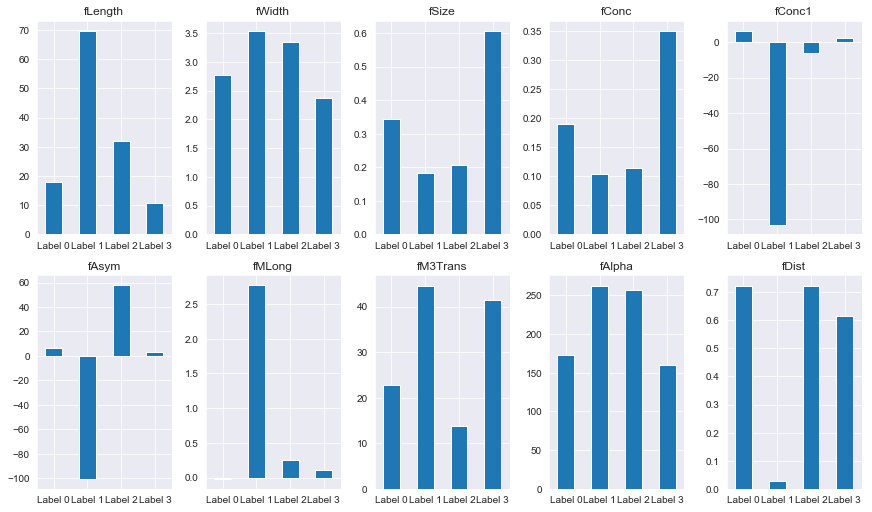

In [17]:
plot_kmeans_avg_values(4)

#### Expectation Maximization

In [18]:
from sklearn.mixture import GaussianMixture

In [19]:
ex_max_dict = {}
for k in range(2,11):
    ex_max = GaussianMixture(n_components=k, random_state=42).fit(X_scaled)
    gamma_df[f'Ex-Max {k} Label'] = ex_max.predict(X_scaled)
    
    plot_df = pd.DataFrame(index=new_rows, columns=[f'Label {k_}' for k_ in range(k)])
    for n in range(k):
        for m in range(len(new_rows)):
            plot_df.iloc[m,n] = gamma_df[gamma_df[f'Ex-Max {k} Label'] == n].iloc[:,m+1].mean()
    ex_max_dict[k] = plot_df

In [21]:
ex_max_dict[4]

,Label 0,Label 1,Label 2,Label 3
fLength,17.6426,25.6441,45.8286,11.7056
fWidth,2.77171,3.27753,3.24291,2.42172
fSize,0.334678,0.215768,0.243709,0.566374
fConc,0.182699,0.118289,0.138776,0.325305
fConc1,6.85694,3.19501,-46.0043,4.89341
fAsym,4.67107,54.4694,-15.429,5.69793
fMLong,0.019809,0.488001,0.679296,0.077389
fM3Trans,26.1769,4.63245,36.5008,35.8983
fAlpha,167.733,246.612,244.203,160.35
fDist,0.69706,0.966222,0.205448,0.67661


In [22]:
def plot_ex_max_avg_values(k):
    fig, ax = plt.subplots(2,5, figsize=(12,7), constrained_layout=True)
    #fig.suptitle('Average Feature Value by Label', fontsize=14)
    for i in range(2):
        for j in range(5):
            ex_max_dict[k].iloc[(i*5)+j,:].plot.bar(ax=ax[i,j], rot=0)
            ax[i,j].set_title(new_rows[(i*5)+j])

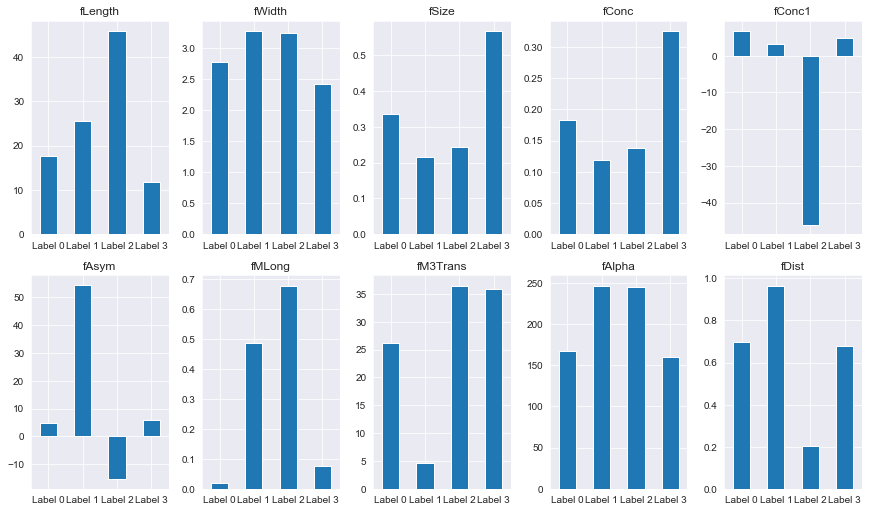

In [24]:
plot_ex_max_avg_values(4)

## Dimensionality Reduction

#### PCA

In [425]:
from sklearn.decomposition import PCA

pca = PCA()#n_components=3)
data_pca = pca.fit_transform(X_scaled)


In [363]:
pca_var = pd.DataFrame()
pca_var['Explained Variance'] = pca.explained_variance_ratio_
pca_var['PCA'] = [f'PCA {i}' for i in range(1,len(pca_var)+1)]

Text(0.5, 0, '')

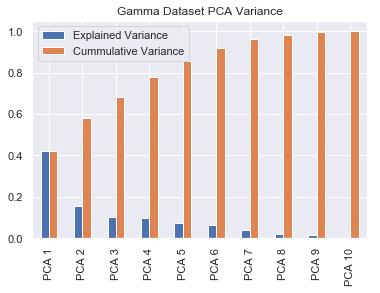

In [542]:
fig, ax = plt.subplots()
pca_var.plot.bar(x='PCA', title='Gamma Dataset PCA Variance', ax=ax)
ax.set_xlabel('')

In [367]:
pca_var['Cummulative Variance'] = pca_var['Explained Variance'].cumsum()

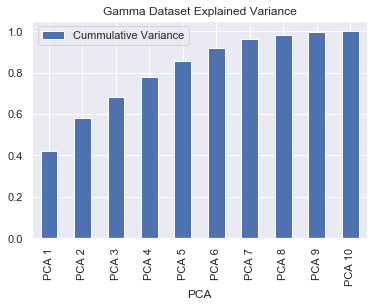

In [368]:
pca_var.plot.bar(x='PCA', y='Cummulative Variance', title='Gamma Dataset Explained Variance')

In [30]:
pca_ = []
for i in range(data_pca.shape[1]):
    pca_.append(data_pca[:,i])

In [31]:
pca_df = pd.DataFrame()
for i in range(len(pca_)):
    pca_df[f'PCA {i+1}'] = pca_[i]
pca_df['Label'] = gamma_df['Label']

##### PCA 1D

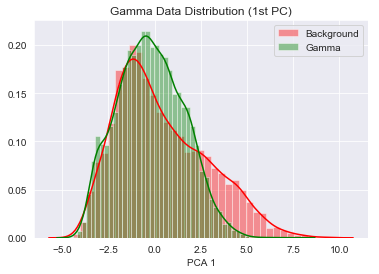

In [43]:
sns.distplot(pca_df[pca_df['Label'] == 0]['PCA 1'], label='Background', color='r')
sns.distplot(pca_df[pca_df['Label'] == 1]['PCA 1'], label='Gamma', color='g')
plt.title('Gamma Data Distribution (1st PC)')
plt.legend();

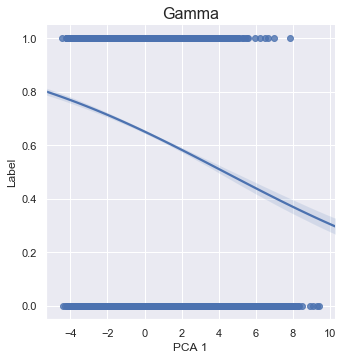

In [543]:
sns.lmplot(x='PCA 1', y='Label', data=pca_df, logistic=True)
plt.title('Gamma', fontsize=16);

##### PCA 2D

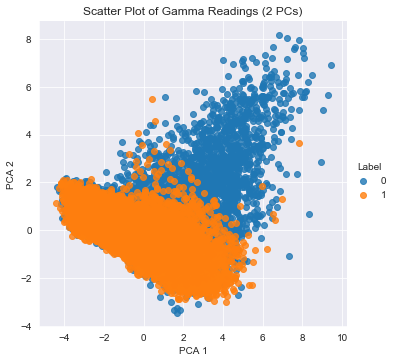

In [45]:
sns.lmplot(x='PCA 1', y='PCA 2', data=pca_df, hue='Label', fit_reg=False)
plt.title('Scatter Plot of Gamma Readings (2 PCs)');

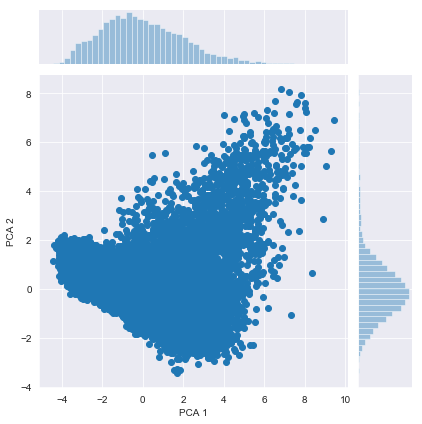

In [47]:
sns.jointplot(x='PCA 1', y='PCA 2', data=pca_df);

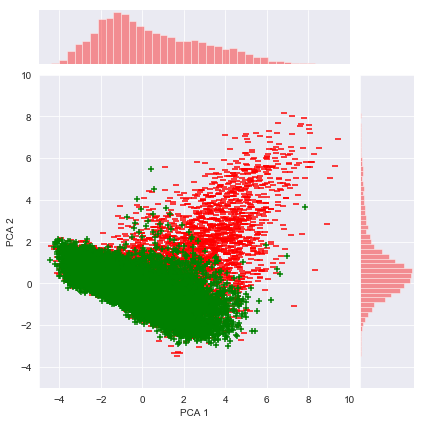

In [48]:
graph = sns.jointplot(x='PCA 1', y='PCA 2', data=pca_df[pca_df['Label'] == 0], xlim=(-5,10), ylim=(-5,10), color='r', marker='_');

graph.x = pca_df[pca_df['Label'] == 1]['PCA 1']
graph.y = pca_df[pca_df['Label'] == 1]['PCA 2']
graph.plot_joint(plt.scatter, marker='+', c='g');

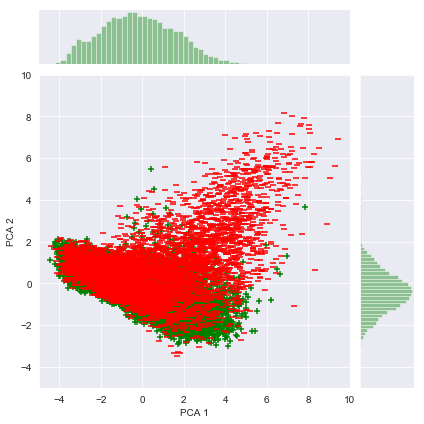

In [49]:
graph = sns.jointplot(x='PCA 1', y='PCA 2', data=pca_df[pca_df['Label'] == 1], xlim=(-5,10), ylim=(-5,10), color='g', marker='+');

graph.x = pca_df[pca_df['Label'] == 0]['PCA 1']
graph.y = pca_df[pca_df['Label'] == 0]['PCA 2']
graph.plot_joint(plt.scatter, c='r', marker='_');

In [51]:
from mpl_toolkits import mplot3d

In [52]:
# https://stackoverflow.com/questions/40622203/how-to-plot-3d-gaussian-distribution-with-matplotlib
from scipy.stats import multivariate_normal

In [57]:
'''
x, y = np.meshgrid(pca_[0], pca_[1])
xy = np.column_stack([x.flat, y.flat])

mu = np.array([np.mean(pca_[0]), np.mean(pca_[1])])
sigma = np.array([np.var(pca_[0]), np.var(pca_[1])])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
z = z.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(x, y, z, cmap='viridis')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2');
'''

"\nx, y = np.meshgrid(pca_[0], pca_[1])\nxy = np.column_stack([x.flat, y.flat])\n\nmu = np.array([np.mean(pca_[0]), np.mean(pca_[1])])\nsigma = np.array([np.var(pca_[0]), np.var(pca_[1])])\ncovariance = np.diag(sigma**2)\n\nz = multivariate_normal.pdf(xy, mean=mu, cov=covariance)\nz = z.reshape(x.shape)\n\nfig = plt.figure()\nax = plt.axes(projection='3d')\nax.scatter(x, y, z, cmap='viridis')\nax.set_xlabel('PCA 1')\nax.set_ylabel('PCA 2');\n"

In [ ]:
background_pca_1 = np.asarray(pca_df[pca_df['Label'] == 0]['PCA 1'])
background_pca_2 = np.asarray(pca_df[pca_df['Label'] == 0]['PCA 2'])

gamma_pca_1 = np.asarray(pca_df[pca_df['Label'] == 1]['PCA 1'])
gamma_pca_2 = np.asarray(pca_df[pca_df['Label'] == 1]['PCA 2'])

In [ ]:
x, y = np.meshgrid(background_pca_1, background_pca_2)
xy = np.column_stack([x.flat, y.flat])

mu = np.array([np.mean(background_pca_1), np.mean(bakground_pca_2)])
sigma = np.array([np.var(background_pca_1), np.var(background_pca_2)])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
z = z.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 25, cmap='binary')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2');

In [ ]:
x, y = np.meshgrid(gamma_pca_1, gamma_pca_2)
xy = np.column_stack([x.flat, y.flat])

mu = np.array([np.mean(gamma_pca_1), np.mean(gamma_pca_2)])
sigma = np.array([np.var(gamma_pca_1), np.var(gamma_pca_2)])
covariance = np.diag(sigma**2)

z = multivariate_normal.pdf(xy, mean=mu, cov=covariance)
z = z.reshape(x.shape)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(x, y, z, 25, cmap='binary')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2');

##### PCA 3D

In [85]:
%matplotlib inline

NameError: name 'Z' is not defined

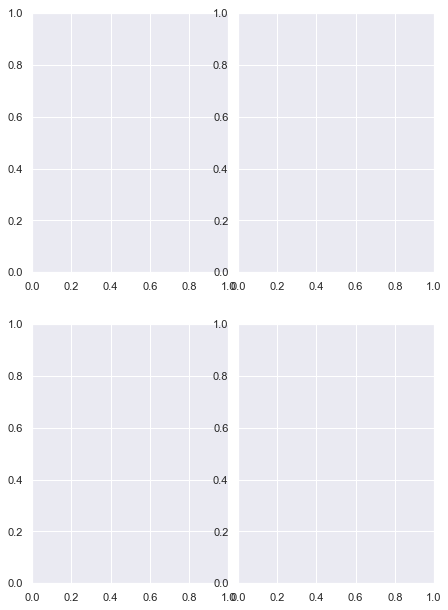

In [394]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(1, 0, 0), (0, 1, 0)]  # R -> G -> B
n_bins = [3, 6, 10, 100]  # Discretizes the interpolation into bins
cmap_name = 'my_list'
fig, axs = plt.subplots(2, 2, figsize=(6, 9))
fig.subplots_adjust(left=0.02, bottom=0.06, right=0.95, top=0.94, wspace=0.05)
for n_bin, ax in zip(n_bins, axs.ravel()):
    # Create the colormap
    cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)
    # Fewer bins will result in "coarser" colomap interpolation
    im = ax.imshow(Z, interpolation='nearest', origin='lower', cmap=cm)
    ax.set_title("N bins: %s" % n_bin)
    fig.colorbar(im, ax=ax)

In [395]:
cm = LinearSegmentedColormap.from_list(
        cmap_name, colors, N=n_bin)

In [426]:
print(data_pca.shape)
print(y_value.shape)
data_pca_ = np.concatenate((data_pca, np.asarray(y_value).reshape(y_value.shape[0], 1)), axis=1)
np.random.shuffle(data_pca_)
print(data_pca_.shape)

(19020, 10)
(19020,)
(19020, 11)


In [427]:
data_pca_.shape

(19020, 11)

In [423]:
np.random.shuffle(data_pca_)

In [415]:
shuff_data_pca[:,0]

TypeError: 'NoneType' object is not subscriptable

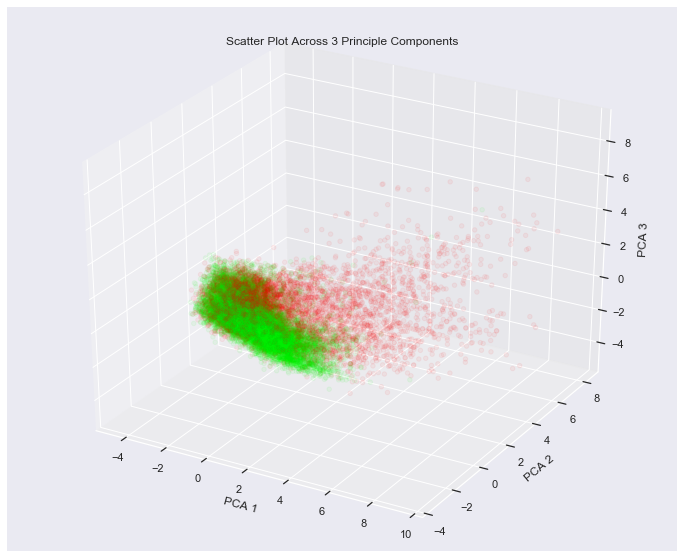

In [430]:


fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
ax.scatter3D(data_pca_[:,0], data_pca_[:,1], data_pca_[:,2], c=data_pca_[:,-1], cmap=cm, alpha=0.05)
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
ax.set_title('Scatter Plot Across 3 Principle Components');

#### ICA

In [431]:
from sklearn.decomposition import FastICA

ica = FastICA()#n_components=3)
data_ica = ica.fit_transform(X_scaled)


In [432]:
ica_df = pd.DataFrame(data_ica, columns=[f'ICA {i+1}' for i in range(data_ica.shape[1])])
ica_df.head()

,ICA 1,ICA 2,ICA 3,ICA 4,ICA 5,ICA 6,ICA 7,ICA 8,ICA 9,ICA 10
0,-0.003471,-0.000896,0.006588,-0.000603,-0.000726,0.005661,0.000844,-0.002964,-0.009128,0.001927
1,-0.003419,0.004271,-0.022824,0.003887,-0.001054,-0.007788,0.001493,-0.002564,-0.000560,0.002522
2,0.024163,-0.004592,0.001234,0.004416,-0.046150,0.005249,0.024531,-0.014388,0.000922,0.013299
3,-0.002478,0.003051,-0.015400,-0.004611,-0.000797,-0.003053,0.002899,0.000768,-0.008031,0.002353
4,0.006574,-0.001165,-0.001506,-0.001662,0.004129,-0.008495,0.001237,-0.001682,0.013829,-0.000974


In [433]:
ica_df.corr()

,ICA 1,ICA 2,ICA 3,ICA 4,ICA 5,ICA 6,ICA 7,ICA 8,ICA 9,ICA 10
ICA 1,1.000000e+00,-1.231911e-15,-7.948015e-16,5.484267e-16,2.254278e-15,-2.516433e-16,-4.668304e-16,2.018188e-15,5.278574e-16,1.540207e-15
ICA 2,-1.231911e-15,1.000000e+00,3.179425e-15,1.321533e-15,1.161146e-15,1.001982e-15,-1.413622e-15,1.455026e-15,3.709916e-15,3.684939e-15
ICA 3,-7.948015e-16,3.179425e-15,1.000000e+00,-3.485414e-17,1.275456e-15,-2.030186e-16,-2.041297e-15,1.284143e-15,-6.142852e-16,3.341698e-15
ICA 4,5.484267e-16,1.321533e-15,-3.485414e-17,1.000000e+00,-9.016597e-16,-4.390933e-15,-3.623158e-16,1.864035e-15,-2.899712e-15,1.538498e-16
ICA 5,2.254278e-15,1.161146e-15,1.275456e-15,-9.016597e-16,1.000000e+00,8.129939e-16,-3.924601e-16,-2.418351e-15,3.922959e-16,-6.527155e-16
ICA 6,-2.516433e-16,1.001982e-15,-2.030186e-16,-4.390933e-15,8.129939e-16,1.000000e+00,6.071295e-16,-6.649683e-16,4.244313e-17,-2.523950e-15
ICA 7,-4.668304e-16,-1.413622e-15,-2.041297e-15,-3.623158e-16,-3.924601e-16,6.071295e-16,1.000000e+00,8.963506e-16,-2.041993e-15,-4.121298e-16
ICA 8,2.018188e-15,1.455026e-15,1.284143e-15,1.864035e-15,-2.418351e-15,-6.649683e-16,8.963506e-16,1.000000e+00,1.012835e-15,-6.824104e-16
ICA 9,5.278574e-16,3.709916e-15,-6.142852e-16,-2.899712e-15,3.922959e-16,4.244313e-17,-2.041993e-15,1.012835e-15,1.000000e+00,-1.196064e-15
ICA 10,1.540207e-15,3.684939e-15,3.341698e-15,1.538498e-16,-6.527155e-16,-2.523950e-15,-4.121298e-16,-6.824104e-16,-1.196064e-15,1.000000e+00


In [434]:
from pandas.plotting import scatter_matrix

#attributes = list(ica_df.columns)
#scatter_matrix(ica_df[attributes], figsize=(15,15));

In [435]:
from sklearn.feature_selection import mutual_info_regression

In [436]:
mutual_info_regression(data_ica[:,0].reshape(-1,1), data_ica[:,1].reshape(-1,1))

C:\Users\folli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([0.08264342])

In [437]:
ica = FastICA(n_components=3)
data_ica = ica.fit_transform(X_scaled)

In [438]:
ica_df = pd.DataFrame(data_ica, columns=[f'ICA {i+1}' for i in range(data_ica.shape[1])])
ica_df.head()

,ICA 1,ICA 2,ICA 3
0,-0.002639,0.000715,0.006635
1,-0.001592,0.008932,-0.003598
2,0.008605,-0.024430,0.000774
3,-0.006481,0.006937,-0.001190
4,0.007206,0.000567,-0.002849


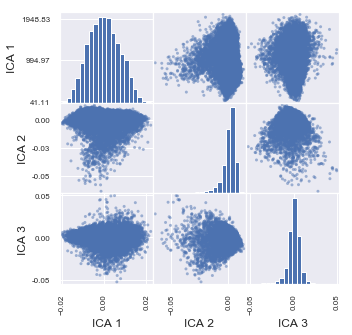

In [556]:
from matplotlib.ticker import FormatStrFormatter

scat_matrx = scatter_matrix(ica_df, figsize=(5,5), hist_kwds={'bins':20});
for ax in scat_matrx.ravel():
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

In [440]:
mutual_info_1 = []
mutual_info_2 = []
mutual_info_3 = []
for i in range(data_ica.shape[1]):
    mutual_info_1.append(mutual_info_regression(data_ica[:,0].reshape(-1,1), data_ica[:,i].reshape(-1,1))[0])
    mutual_info_2.append(mutual_info_regression(data_ica[:,1].reshape(-1,1), data_ica[:,i].reshape(-1,1))[0])
    mutual_info_3.append(mutual_info_regression(data_ica[:,2].reshape(-1,1), data_ica[:,i].reshape(-1,1))[0])

C:\Users\folli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\folli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\folli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\folli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [441]:
mutual_info = pd.DataFrame(columns=ica_df.columns, index=ica_df.columns)
mutual_info['ICA 1'] = mutual_info_1
mutual_info['ICA 2'] = mutual_info_2
mutual_info['ICA 3'] = mutual_info_3
mutual_info

,ICA 1,ICA 2,ICA 3
ICA 1,8.595797,0.055112,0.045648
ICA 2,0.055112,8.595994,0.239311
ICA 3,0.045648,0.239311,8.595578


In [445]:
ica_df.describe()

,ICA 1,ICA 2,ICA 3
count,1.902000e+04,1.902000e+04,1.902000e+04
mean,4.669708e-20,-3.735766e-19,5.837135e-20
std,7.251138e-03,7.251138e-03,7.251138e-03
min,-1.981255e-02,-6.396624e-02,-5.252917e-02
25%,-5.365108e-03,-1.892798e-03,-3.065146e-03
50%,-2.024589e-04,1.700034e-03,4.870842e-04
75%,5.196038e-03,4.272424e-03,4.053133e-03
max,2.216436e-02,1.335684e-02,4.955158e-02


In [114]:
ica = FastICA(n_components=2)
data_ica = ica.fit_transform(X_scaled)

In [115]:
ica_ = []
for i in range(data_ica.shape[1]):
    ica_.append(data_ica[:,i])

In [116]:
ica_df = pd.DataFrame()
for i in range(len(ica_)):
    ica_df[f'ICA {i+1}'] = ica_[i]
ica_df['Label'] = gamma_df['Label']

In [118]:
ica_df.head()

,ICA 1,ICA 2,Label
0,0.003794,0.001737,1
1,0.005980,0.003072,1
2,-0.020671,-0.011301,1
3,0.005279,0.007318,1
4,-0.000694,-0.006622,1


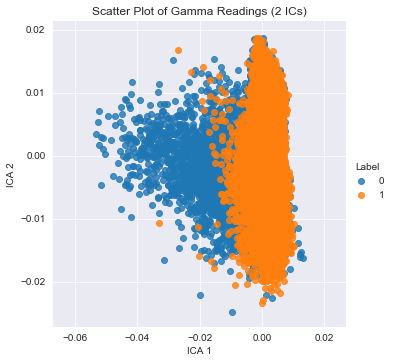

In [120]:
sns.lmplot(x='ICA 1', y='ICA 2', data=ica_df, hue='Label', fit_reg=False)
plt.title('Scatter Plot of Gamma Readings (2 ICs)');

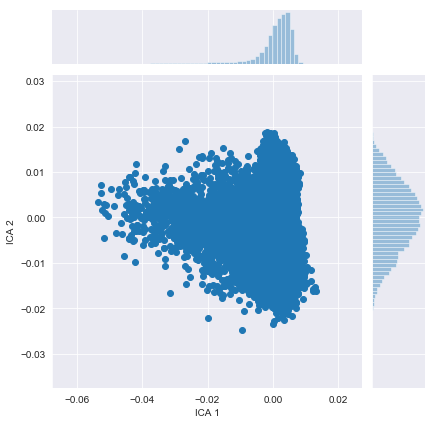

In [121]:
sns.jointplot(x='ICA 1', y='ICA 2', data=ica_df);

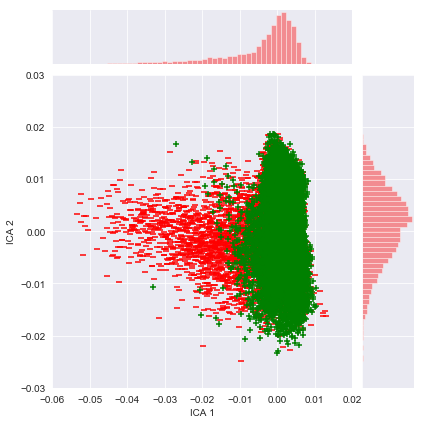

In [123]:
graph = sns.jointplot(x='ICA 1', y='ICA 2', data=ica_df[ica_df['Label'] == 0], xlim=(-.06,.02), ylim=(-.03,.03), color='r', marker='_');
graph.x = ica_df[ica_df['Label'] == 1]['ICA 1']
graph.y = ica_df[ica_df['Label'] == 1]['ICA 2']
graph.plot_joint(plt.scatter, marker='+', c='g');

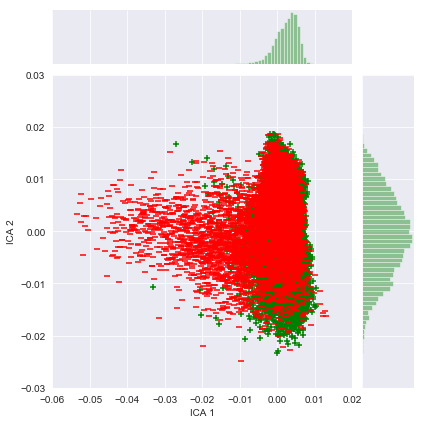

In [124]:
graph = sns.jointplot(x='ICA 1', y='ICA 2', data=ica_df[ica_df['Label'] == 1], xlim=(-.06,.02), ylim=(-.03,.03), color='g', marker='+');
graph.x = ica_df[ica_df['Label'] == 0]['ICA 1']
graph.y = ica_df[ica_df['Label'] == 0]['ICA 2']
graph.plot_joint(plt.scatter, c='r', marker='_');

#### Randomized Projections

In [126]:
from sklearn.random_projection import GaussianRandomProjection

rand_proj = GaussianRandomProjection(n_components=2)
data_rand = rand_proj.fit_transform(X_scaled)

In [127]:
rand_ = []
for i in range(data_rand.shape[1]):
    rand_.append(data_rand[:,i])

In [128]:
rand_df = pd.DataFrame()
for i in range(len(rand_)):
    rand_df[f'Rand Proj {i+1}'] = rand_[i]
rand_df['Label'] = gamma_df['Label']

rand_df.head()

,Rand Proj 1,Rand Proj 2,Label
0,0.257727,1.101099,1
1,-2.035405,-0.105459,1
2,4.260987,-5.923974,1
3,-1.782824,0.528123,1
4,0.769637,-2.045017,1


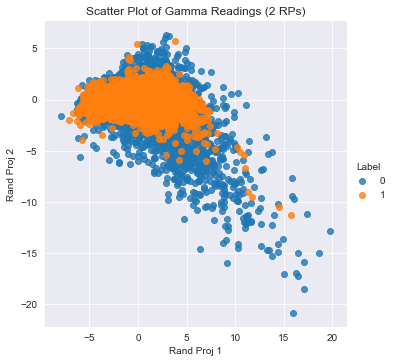

In [129]:
sns.lmplot(x='Rand Proj 1', y='Rand Proj 2', data=rand_df, hue='Label', fit_reg=False)
plt.title('Scatter Plot of Gamma Readings (2 RPs)');

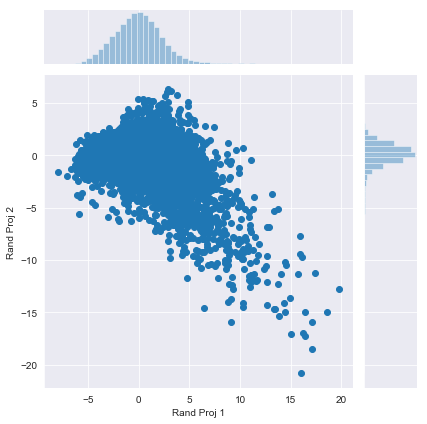

In [130]:
sns.jointplot(x='Rand Proj 1', y='Rand Proj 2', data=rand_df);

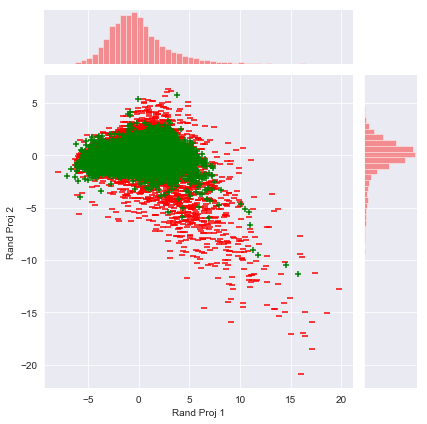

In [131]:
graph = sns.jointplot(x='Rand Proj 1', y='Rand Proj 2', data=rand_df[rand_df['Label'] == 0], color='r', marker='_');
graph.x = rand_df[rand_df['Label'] == 1]['Rand Proj 1']
graph.y = rand_df[rand_df['Label'] == 1]['Rand Proj 2']
graph.plot_joint(plt.scatter, marker='+', c='g');

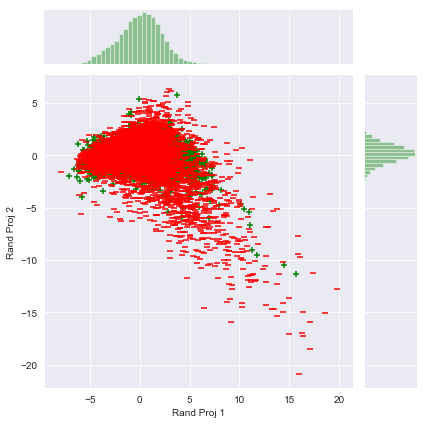

In [132]:
graph = sns.jointplot(x='Rand Proj 1', y='Rand Proj 2', data=rand_df[rand_df['Label'] == 1], color='g', marker='+');
graph.x = rand_df[rand_df['Label'] == 0]['Rand Proj 1']
graph.y = rand_df[rand_df['Label'] == 0]['Rand Proj 2']
graph.plot_joint(plt.scatter, c='r', marker='_');


#### Kernel PCA

In [230]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA()), 
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__n_components": np.asarray(range(2,11)),
    "kpca__gamma": np.linspace(.03, .05, 10), 
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_scaled, y)

C:\Users\folli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\folli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\folli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\folli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\folli\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('kpca', KernelPCA(alpha=1.0, coef0=1, copy_X=True, degree=3, eigen_solver='auto',
     fit_inverse_transform=False, gamma=None, kernel='linear',
     kernel_params=None, max_iter=None, n_components=None, n_jobs=None,
     random_state=None, remove_zero_eig=False, tol=0)), ('log_reg', Logisti...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'kpca__n_components': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'kpca__gamma': array([0.03   , 0.03222, 0.03444, 0.03667, 0.03889, 0.04111, 0.04333,
       0.04556, 0.04778, 0.05   ]), 'kpca__kernel': ['rbf', 'sigmoid']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [147]:
grid_search.best_params_

{'kpca__gamma': 0.05, 'kpca__kernel': 'sigmoid'}

In [148]:
kpca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.05)
data_kpca = kpca.fit_transform(X_scaled)

In [149]:
kpca_ = []
for i in range(data_kpca.shape[1]):
    kpca_.append(data_kpca[:,i])

In [151]:
kpca_df = pd.DataFrame()
for i in range(len(kpca_)):
    kpca_df[f'KPCA {i+1}'] = kpca_[i]
kpca_df['Label'] = gamma_df['Label']
kpca_df.head()

,KPCA 1,KPCA 2,Label
0,0.137498,-0.009727,1
1,0.243409,-0.191462,1
2,-0.761256,0.242828,1
3,0.394629,-0.128421,1
4,-0.254180,-0.087228,1


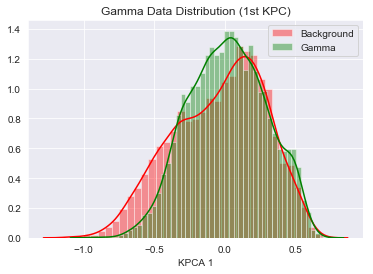

In [153]:
sns.distplot(kpca_df[kpca_df['Label'] == 0]['KPCA 1'], label='Background', color='r')
sns.distplot(kpca_df[kpca_df['Label'] == 1]['KPCA 1'], label='Gamma', color='g')
plt.title('Gamma Data Distribution (1st KPC)')
plt.legend();

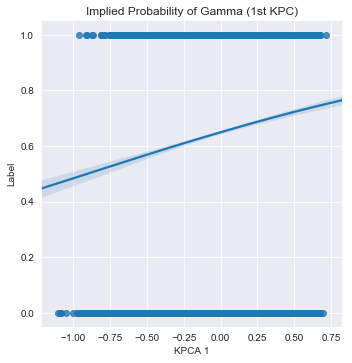

In [154]:
sns.lmplot(x='KPCA 1', y='Label', data=kpca_df, logistic=True)
plt.title('Implied Probability of Gamma (1st KPC)');

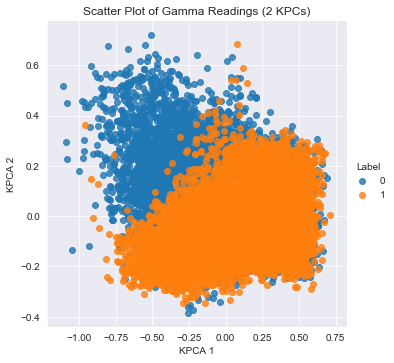

In [155]:
sns.lmplot(x='KPCA 1', y='KPCA 2', data=kpca_df, hue='Label', fit_reg=False)
plt.title('Scatter Plot of Gamma Readings (2 KPCs)');

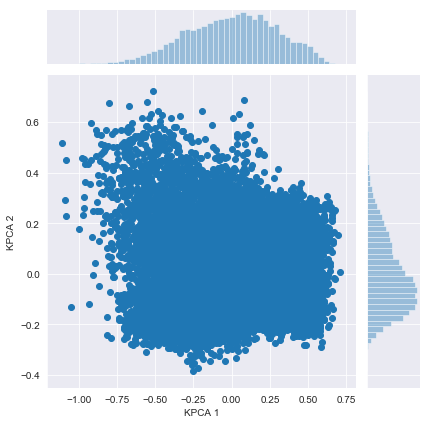

In [156]:
sns.jointplot(x='KPCA 1', y='KPCA 2', data=kpca_df);

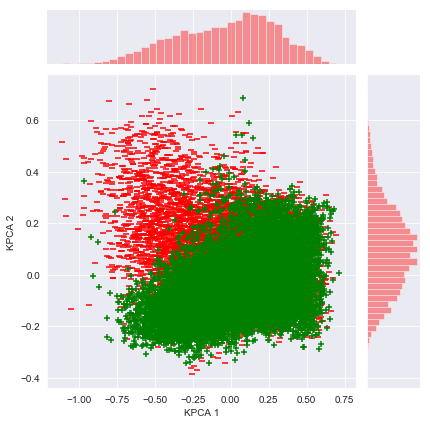

In [157]:
graph = sns.jointplot(x='KPCA 1', y='KPCA 2', data=kpca_df[kpca_df['Label'] == 0], color='r', marker='_');
graph.x = kpca_df[kpca_df['Label'] == 1]['KPCA 1']
graph.y = kpca_df[kpca_df['Label'] == 1]['KPCA 2']
graph.plot_joint(plt.scatter, marker='+', c='g');

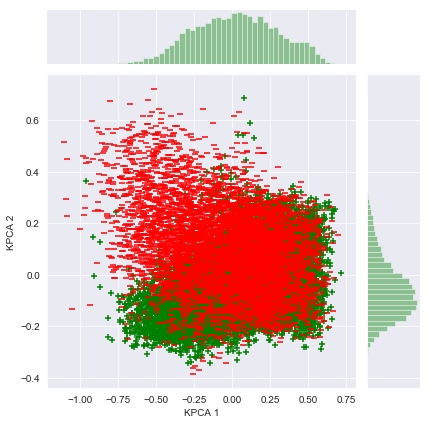

In [158]:
graph = sns.jointplot(x='KPCA 1', y='KPCA 2', data=kpca_df[kpca_df['Label'] == 1], color='g', marker='+');
graph.x = kpca_df[kpca_df['Label'] == 0]['KPCA 1']
graph.y = kpca_df[kpca_df['Label'] == 0]['KPCA 2']
graph.plot_joint(plt.scatter, c='r', marker='_');

## Clustering on Reduced Dimensions

In [ ]:
kmeans_dict = {}
cluster_distances = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    gamma_df[f'{k}-means Label'] = kmeans.labels_
    
    plot_df = pd.DataFrame(index=new_rows, columns=[f'Label {k_}' for k_ in range(k)])
    for n in range(k):
        for m in range(len(new_rows)):
            plot_df.iloc[m,n] = gamma_df[gamma_df[f'{k}-means Label'] == n].iloc[:,m+1].mean()
    kmeans_dict[k] = plot_df
    
    cluster_distances.append(np.amin(kmeans.transform(X_scaled), axis=1).sum())

In [446]:
data_kpca

array([[ 0.13749848, -0.00972694],
       [ 0.24340889, -0.19146248],
       [-0.7612563 ,  0.24282794],
       ...,
       [-0.41616424,  0.02308864],
       [-0.59073838,  0.3159775 ],
       [-0.32963804,  0.46036145]])

In [447]:
kpca_df.head()

,KPCA 1,KPCA 2,Label,KPCA Label
0,0.137498,-0.009727,1,0
1,0.243409,-0.191462,1,0
2,-0.761256,0.242828,1,1
3,0.394629,-0.128421,1,0
4,-0.254180,-0.087228,1,0


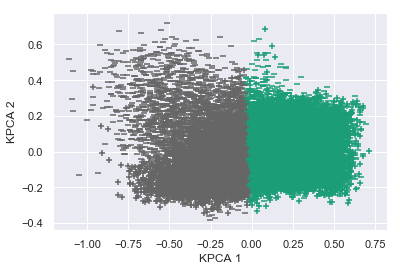

In [449]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit(data_kpca).predict(data_kpca)

kpca_df['KPCA Label'] = labels

fig, ax = plt.subplots()
plt.scatter(x=kpca_df[kpca_df['Label'] == 0]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 0]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 0]['KPCA Label'], cmap='Dark2', marker='_')
plt.scatter(x=kpca_df[kpca_df['Label'] == 1]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 1]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 1]['KPCA Label'], cmap='Dark2', marker='+')
ax.set_ylabel('KPCA 2')
ax.set_xlabel('KPCA 1');

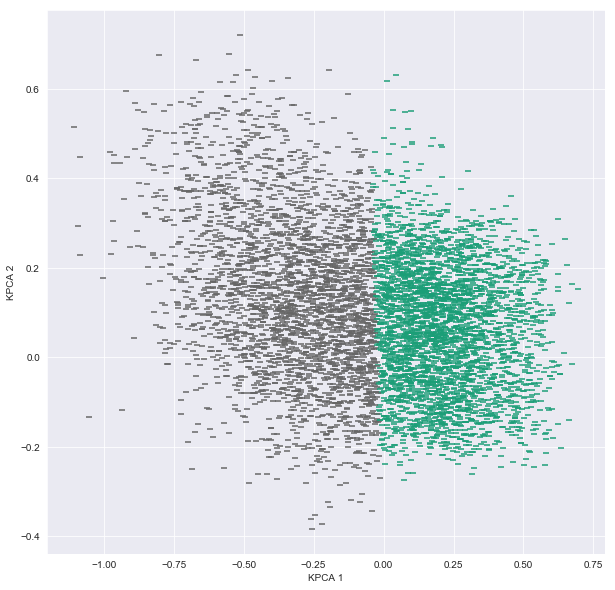

In [194]:
fig, ax = plt.subplots(figsize=(10,10))
plt.scatter(x=kpca_df[kpca_df['Label'] == 0]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 0]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 0]['KPCA Label'], cmap='Dark2', marker='_')
#plt.scatter(x=kpca_df[kpca_df['Label'] == 1]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 1]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 1]['KPCA Label'], cmap='Dark2', marker='+')
ax.set_ylabel('KPCA 2')
ax.set_xlabel('KPCA 1');

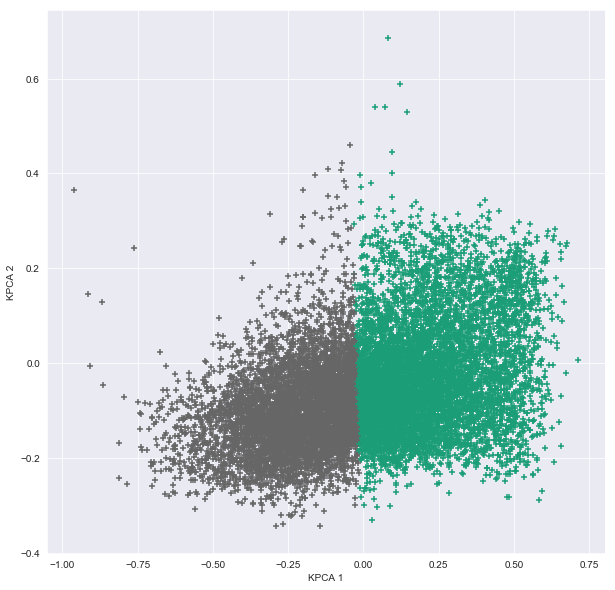

In [195]:
fig, ax = plt.subplots(figsize=(10,10))
#plt.scatter(x=kpca_df[kpca_df['Label'] == 0]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 0]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 0]['KPCA Label'], cmap='Dark2', marker='_')
plt.scatter(x=kpca_df[kpca_df['Label'] == 1]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 1]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 1]['KPCA Label'], cmap='Dark2', marker='+')
ax.set_ylabel('KPCA 2')
ax.set_xlabel('KPCA 1');

In [450]:
from scipy.spatial.distance import cdist

centers = kmeans.cluster_centers_
radii = [cdist(data_kpca[:,0], data_kpca[:,1], [center]).max() for i, center in enumerate(centers)]
for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

ValueError: XA must be a 2-dimensional array.

In [455]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=2, rseed=42, ax=None):
    labels = kmeans.fit_predict(X)
    kpca_df['KPCA Label'] = labels

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    #ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    ax.scatter(x=kpca_df[kpca_df['Label'] == 0]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 0]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 0]['KPCA Label'], cmap='Dark2', marker='_', s=40, zorder=2)
    ax.scatter(x=kpca_df[kpca_df['Label'] == 1]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 1]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 1]['KPCA Label'], cmap='Dark2', marker='+', s=40, zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    ax.set_xlabel('KPCA 1')
    ax.set_ylabel('KPCA 2')
    ax.set_title('K-means with Kernel PCA')

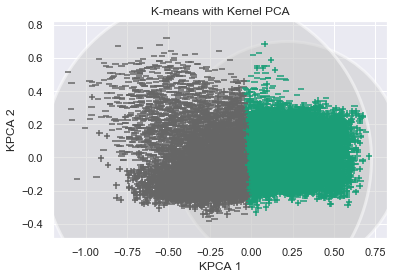

In [456]:
fig, ax = plt.subplots()
plot_kmeans(kmeans, data_kpca, n_clusters=2, rseed=42, ax=ax)

In [457]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    kpca_df['KPCA Label'] = labels
    if label:
        #ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
        ax.scatter(x=kpca_df[kpca_df['Label'] == 0]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 0]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 0]['KPCA Label'], cmap='Dark2', marker='_', s=40, zorder=2)
        ax.scatter(x=kpca_df[kpca_df['Label'] == 1]['KPCA 1'], y=kpca_df[kpca_df['Label'] == 1]['KPCA 2'], c=kpca_df[kpca_df['Label'] == 1]['KPCA Label'], cmap='Dark2', marker='+', s=40, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
    ax.set_xlabel('KPCA 1')
    ax.set_ylabel('KPCA 2')
    ax.set_title('Expectation Maximization with Kernel PCA')

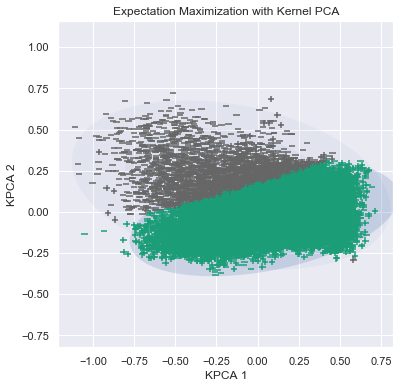

In [459]:
gmm = GaussianMixture(n_components=2, random_state=42)
fig, ax = plt.subplots(figsize=(6,6))
plot_gmm(gmm, data_kpca, ax=ax)

### Neural Network on Reduced Dimensions

In [231]:
grid_search.best_params_

{'kpca__gamma': 0.03888888888888889,
 'kpca__kernel': 'sigmoid',
 'kpca__n_components': 9}

In [477]:
nn_kpca = KernelPCA(n_components=9, kernel="sigmoid", gamma=0.03888888888888889)
nn_data_kpca = nn_kpca.fit_transform(X_scaled)

In [478]:
scaled_data = pd.DataFrame(X_scaled, columns=X.columns)
scaled_data['class'] = y_value
scaled_data.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fMLong,fM3Trans,fAlpha,fDist,class
0,-0.577226,-0.336804,-0.381130,0.062759,-0.148923,0.541042,0.224818,-0.405842,0.476816,-1.497866,1.0
1,-0.510969,-0.570027,-0.648595,0.820383,1.471776,0.516919,0.260364,-0.490094,-0.815418,0.153125,1.0
2,2.568278,6.205858,2.615783,-1.875883,-1.773241,2.044992,-1.478536,-2.183030,1.889224,0.842635,1.0
3,-0.694768,-0.687259,-1.029478,1.282069,1.606608,0.532771,-0.333515,-0.355359,-0.658804,-1.031463,1.0
4,0.516622,0.476384,0.711157,-0.347506,-0.284660,-0.020200,0.353086,1.036620,-0.881039,2.176427,1.0


In [479]:
kpca_data = pd.DataFrame(nn_data_kpca, columns=[f'KPCA {i+1}' for i in range(9)])
kpca_data['class'] = y_value
kpca_data.head()

,KPCA 1,KPCA 2,KPCA 3,KPCA 4,KPCA 5,KPCA 6,KPCA 7,KPCA 8,KPCA 9,class
0,-0.121876,0.025239,-0.199097,0.064965,0.040273,-0.021913,0.012142,-0.000909,-0.005536,1.0
1,-0.213534,0.154018,0.096035,0.086035,-0.037495,0.024337,-0.053719,-0.045778,0.019744,1.0
2,0.663702,-0.194266,-0.278129,0.170887,-0.120065,0.249851,-0.030460,-0.069731,-0.114424,1.0
3,-0.343524,0.103172,0.013191,0.061108,0.095253,0.056949,-0.067202,-0.009645,0.017793,1.0
4,0.224485,0.061355,0.205050,-0.123740,-0.120656,0.047638,-0.040537,-0.039341,-0.013670,1.0


In [480]:
y_value = y.map({'g':1.0,'h':0.0})

from sklearn.model_selection import train_test_split

train, test = train_test_split(scaled_data, test_size=0.2, random_state=42)
k_train, k_test = train_test_split(kpca_data, test_size=0.2, random_state=42)

In [481]:
X_train, y_train = np.asarray(train.iloc[:,:-1]), np.asarray(train.iloc[:,-1])
X_test, y_test = np.asarray(test.iloc[:,:-1]), np.asarray(test.iloc[:,-1])
X_labels = list(X.columns)

Xk_train, yk_train = np.asarray(k_train.iloc[:,:-1]), np.asarray(k_train.iloc[:,-1])
Xk_test, yk_test = np.asarray(k_test.iloc[:,:-1]), np.asarray(test.iloc[:,-1])
Xk_labels = list(kpca_data.columns)[:-1]

In [482]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import sklearn

#https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
#https://stackoverflow.com/questions/41032551/how-to-compute-receiving-operating-characteristic-roc-and-auc-in-keras
from keras import backend as K
import tensorflow as tf

def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision(y_true, y_pred):
    """Precision metric.

    Only computes a batch-wise average of precision.

    Computes the precision, a metric for multi-label classification of
    how many selected items are relevant.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [483]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(10,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [484]:
np.random.seed(42)
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy', precision, recall, f1, auroc])

In [485]:
history = model.fit(X_train, 
                   y_train, 
                   epochs=150, 
                   batch_size=512, 
                   validation_split=0.2)

Train on 12172 samples, validate on 3044 samples
Epoch 1/150
12172/12172 [==============================] - 1s 48us/step - loss: 0.6776 - acc: 0.6295 - precision: 0.7076 - recall: 0.7157 - f1: 0.6960 - auroc: 0.6279 - val_loss: 0.6668 - val_acc: 0.6915 - val_precision: 0.7155 - val_recall: 0.8720 - val_f1: 0.7859 - val_auroc: 0.6211
Epoch 2/150
12172/12172 [==============================] - 0s 8us/step - loss: 0.6565 - acc: 0.7166 - precision: 0.7185 - recall: 0.9259 - f1: 0.8089 - auroc: 0.6394 - val_loss: 0.6477 - val_acc: 0.7280 - val_precision: 0.7232 - val_recall: 0.9425 - val_f1: 0.8182 - val_auroc: 0.6446
Epoch 3/150
12172/12172 [==============================] - 0s 8us/step - loss: 0.6368 - acc: 0.7318 - precision: 0.7226 - recall: 0.9518 - f1: 0.8214 - auroc: 0.6617 - val_loss: 0.6267 - val_acc: 0.7385 - val_precision: 0.7297 - val_recall: 0.9508 - val_f1: 0.8254 - val_auroc: 0.6665
Epoch 4/150
12172/12172 [==============================] - 0s 9us/step - loss: 0.6151 - acc: 0.

In [486]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'val_precision', 'val_recall', 'val_f1', 'val_auroc', 'loss', 'acc', 'precision', 'recall', 'f1', 'auroc'])

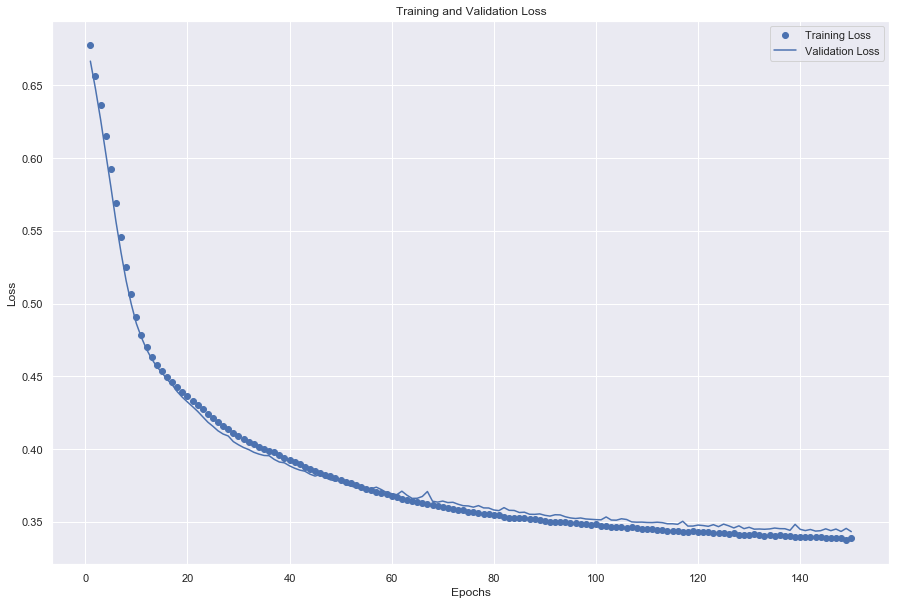

In [487]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,10))
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [488]:
def nn_plot():
    #df_plot = pd.merge(df_boost_train[trn_cv_cols], df_boost_valid[val_cv_cols], left_index=True, right_index=True)
    df_plot = pd.DataFrame(history_dict)
    df_plot['Epochs'] = epochs
    df_plot.index = df_plot['Epochs']
    df_plot['Base Accuracy'] = base_accuracy
    df_plot['Base ROC-AUC'] = base_roc_auc

    y_acc = df_plot[['acc', 'val_acc', 'Base Accuracy']] #[['Training Accuracy', 'Validation Accuracy', 'Base Accuracy']]
    y_f1 = df_plot[['f1', 'val_f1']] #[['Training F1', 'Validation F1']]
    y_prec = df_plot[['precision', 'val_precision']] #[['Training Precision', 'Validation Precision']]
    y_rec = df_plot[['recall', 'val_recall']] #[['Training Recall', 'Validation Recall']]
    y_auc = df_plot[['auroc', 'val_auroc']] #[['Training ROC-AUC', 'Validation ROC-AUC', 'Base ROC-AUC']]

    fig, axs = plt.subplots(2, 3, figsize=(20,12))
    fig.suptitle('Neural Network Performance Measures', fontsize=18)
    axs[0,0].plot(y_acc)
    axs[0,0].set_title('Accuracy', fontsize=14)
    axs[0,0].legend((['Training Accuracy', 'Validation Accuracy', 'Base Accuracy']))
    axs[0,1].plot(y_f1)
    axs[0,1].set_title('F1', fontsize=14)
    axs[0,1].legend((['Training F1', 'Validation F1']))
    axs[1,0].plot(y_prec)
    axs[1,0].set_title('Precision', fontsize=14)
    axs[1,0].set_xlabel('Epochs')
    axs[1,0].legend(['Training Precision', 'Validation Precision'])
    axs[1,1].plot(y_rec)
    axs[1,1].set_title('Recall', fontsize=14)
    axs[1,1].set_xlabel('Epochs')
    axs[1,1].legend(['Training Recall', 'Validation Recall'])
    axs[0,2].plot(y_auc)
    axs[0,2].set_title('ROC-AUC', fontsize=14)
    axs[0,2].legend(['Training ROC-AUC', 'Validation ROC-AUC', 'Base ROC-AUC'])
    axs[1,2].plot(df_plot[['val_acc', 'val_precision', 'val_recall', 'val_f1', 'val_auroc']])
    axs[1,2].set_title('Combined Validation Metrics', fontsize=14)
    axs[1,2].set_xlabel('Epochs')
    axs[1,2].legend(['Validation Accuracy', 'Validation Precisioin', 'Validation Recall', 'Validation F1', 'Validation ROC-AUC'])
    axs[1,2].set_ylim(0,1);

In [489]:
base_accuracy = max(accuracy_score(y_value, [0] * len(y)), 1 - accuracy_score(y_value, [0] * len(y_value)))
base_roc_auc = 0.5

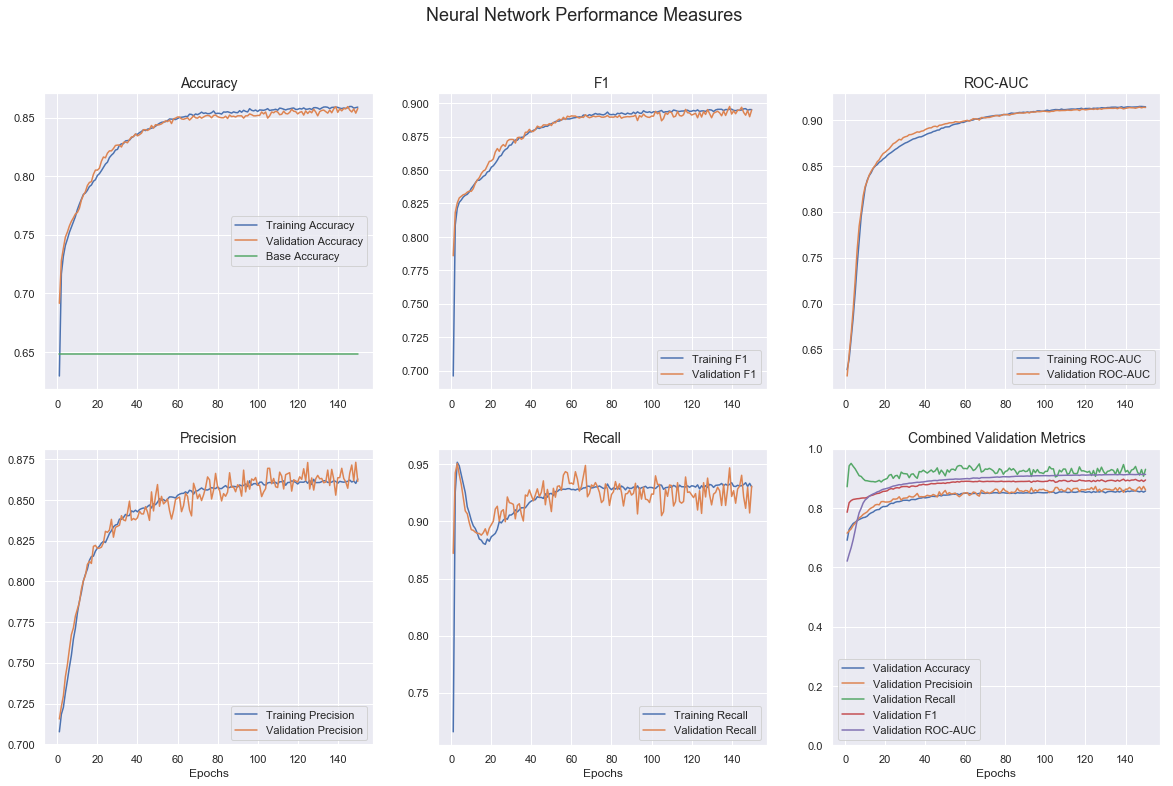

In [490]:
nn_plot()

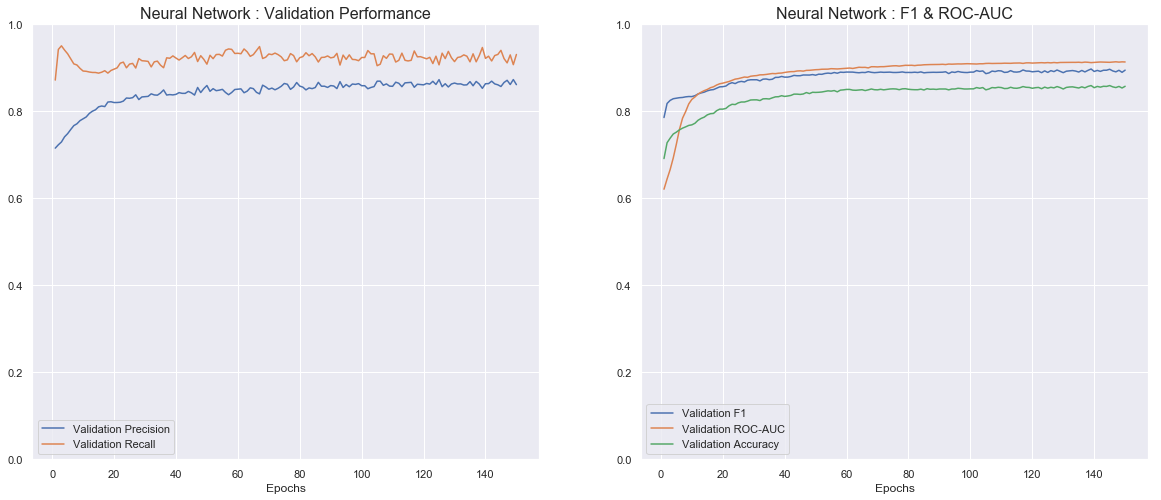

In [491]:
df_plot = pd.DataFrame(history_dict)
df_plot['Epochs'] = epochs
df_plot.index = df_plot['Epochs']
df_plot['Base Accuracy'] = base_accuracy
df_plot['Base ROC-AUC'] = base_roc_auc

fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].plot(df_plot[['val_precision', 'val_recall']])
axs[0].set_xlabel('Epochs')
axs[0].set_title('Neural Network : Validation Performance', fontsize=16)
axs[0].legend(['Validation Precision', 'Validation Recall'])
axs[0].set_ylim(0,1)
axs[1].plot(df_plot[['val_f1', 'val_auroc', 'val_acc']])
axs[1].set_title('Neural Network : F1 & ROC-AUC', fontsize=16)
axs[1].set_xlabel('Epochs')
axs[1].legend(['Validation F1', 'Validation ROC-AUC', 'Validation Accuracy'])
plt.ylim(0,1);

In [492]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(10,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

np.random.seed(42)
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy', precision, recall, f1, auroc])

model.fit(X_train, y_train, epochs=df_plot['val_auroc'].argmax(), batch_size=512)
results = model.evaluate(X_test, y_test)

C:\Users\folli\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  app.launch_new_instance()


Epoch 1/147
15216/15216 [==============================] - 1s 37us/step - loss: 0.7186 - acc: 0.4432 - precision: 0.7856 - recall: 0.1786 - f1: 0.2781 - auroc: 0.6531
Epoch 2/147
15216/15216 [==============================] - 0s 7us/step - loss: 0.6893 - acc: 0.6006 - precision: 0.8173 - recall: 0.4977 - f1: 0.6139 - auroc: 0.6976
Epoch 3/147
15216/15216 [==============================] - 0s 7us/step - loss: 0.6753 - acc: 0.6863 - precision: 0.7885 - recall: 0.7063 - f1: 0.7437 - auroc: 0.7309
Epoch 4/147
15216/15216 [==============================] - 0s 7us/step - loss: 0.6638 - acc: 0.7254 - precision: 0.7835 - recall: 0.7971 - f1: 0.7897 - auroc: 0.7547
Epoch 5/147
15216/15216 [==============================] - 0s 8us/step - loss: 0.6511 - acc: 0.7430 - precision: 0.7959 - recall: 0.8119 - f1: 0.8036 - auroc: 0.7688
Epoch 6/147
15216/15216 [==============================] - 0s 7us/step - loss: 0.6371 - acc: 0.7560 - precision: 0.8004 - recall: 0.8311 - f1: 0.8153 - auroc: 0.7766
Epo

In [493]:
model_scores = pd.DataFrame(index=['Accuracy', 'F1', 'Precision', 'Recall', 'ROC-AUC'])
model_scores['Original Neural Network'] = results[1:]
model_scores

,Original Neural Network
Accuracy,0.867771
F1,0.860004
Precision,0.950247
Recall,0.901015
ROC-AUC,0.912886


In [494]:
y_pred = model.predict(X_test)
model_predictions = np.asarray([round(num[0],0) for num in y_pred])

cm_df = pd.crosstab(y_test, model_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
roc = roc_curve(y_test, y_pred)

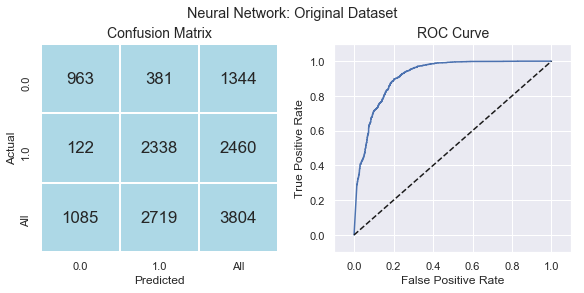

In [500]:
fpr, tpr, thresholds = roc[0], roc[1], roc[2]

from matplotlib.colors import ListedColormap

fig, axs = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)
sns.set(font_scale=1.4)
sns.heatmap(cm_df, annot=True, fmt='g', cmap=ListedColormap(['lightblue']), cbar=False, linewidths=1, ax=axs[0]);
sns.set(font_scale=1)
axs[0].set_title('Confusion Matrix', fontsize=14)
axs[1].plot(fpr, tpr)
axs[1].plot([0,1], [0,1], 'k--')
axs[1].axis([0,1,0,1])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_xlim(-.1,1.1)
axs[1].set_ylim(-.1,1.1)
axs[1].set_title('ROC Curve', fontsize=14)
fig.suptitle('Neural Network: Original Dataset');

In [501]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(9,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [502]:
np.random.seed(42)
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy', precision, recall, f1, auroc])

In [503]:
history = model.fit(Xk_train, 
                   yk_train, 
                   epochs=150, 
                   batch_size=512, 
                   validation_split=0.2)

Train on 12172 samples, validate on 3044 samples
Epoch 1/150
12172/12172 [==============================] - 1s 52us/step - loss: 0.6828 - acc: 0.6525 - precision: 0.6547 - recall: 0.9836 - f1: 0.7850 - auroc: 0.5560 - val_loss: 0.6741 - val_acc: 0.6505 - val_precision: 0.6505 - val_recall: 1.0000 - val_f1: 0.7880 - val_auroc: 0.5946
Epoch 2/150
12172/12172 [==============================] - 0s 9us/step - loss: 0.6673 - acc: 0.6489 - precision: 0.6487 - recall: 1.0000 - f1: 0.7868 - auroc: 0.6254 - val_loss: 0.6586 - val_acc: 0.6505 - val_precision: 0.6505 - val_recall: 1.0000 - val_f1: 0.7880 - val_auroc: 0.6537
Epoch 3/150
12172/12172 [==============================] - 0s 8us/step - loss: 0.6518 - acc: 0.6489 - precision: 0.6487 - recall: 1.0000 - f1: 0.7868 - auroc: 0.6754 - val_loss: 0.6427 - val_acc: 0.6505 - val_precision: 0.6505 - val_recall: 1.0000 - val_f1: 0.7880 - val_auroc: 0.6950
Epoch 4/150
12172/12172 [==============================] - 0s 9us/step - loss: 0.6356 - acc: 0.

In [504]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'val_precision', 'val_recall', 'val_f1', 'val_auroc', 'loss', 'acc', 'precision', 'recall', 'f1', 'auroc'])

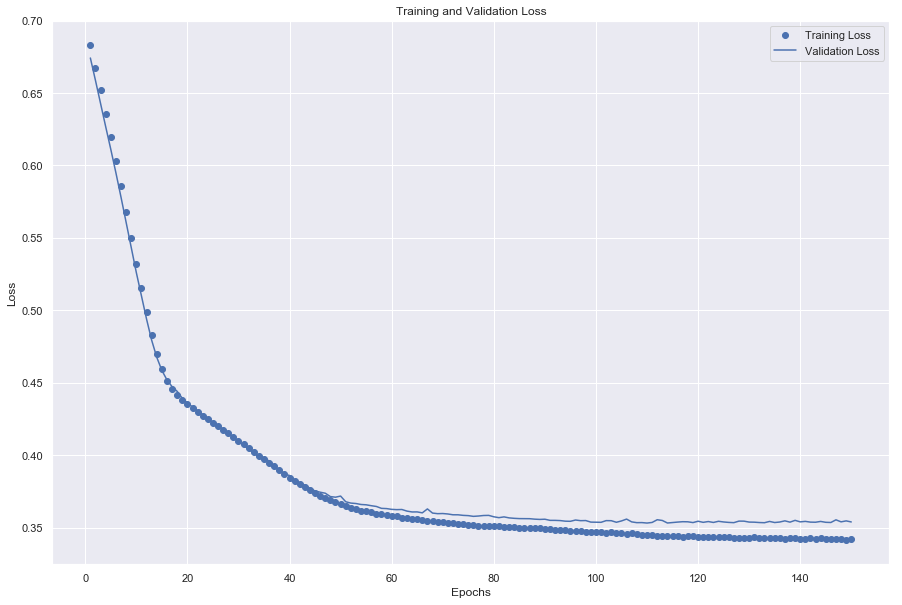

In [505]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,10))
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [506]:
def nn_plot():
    #df_plot = pd.merge(df_boost_train[trn_cv_cols], df_boost_valid[val_cv_cols], left_index=True, right_index=True)
    df_plot = pd.DataFrame(history_dict)
    df_plot['Epochs'] = epochs
    df_plot.index = df_plot['Epochs']
    df_plot['Base Accuracy'] = base_accuracy
    df_plot['Base ROC-AUC'] = base_roc_auc

    y_acc = df_plot[['acc', 'val_acc', 'Base Accuracy']] #[['Training Accuracy', 'Validation Accuracy', 'Base Accuracy']]
    y_f1 = df_plot[['f1', 'val_f1']] #[['Training F1', 'Validation F1']]
    y_prec = df_plot[['precision', 'val_precision']] #[['Training Precision', 'Validation Precision']]
    y_rec = df_plot[['recall', 'val_recall']] #[['Training Recall', 'Validation Recall']]
    y_auc = df_plot[['auroc', 'val_auroc']] #[['Training ROC-AUC', 'Validation ROC-AUC', 'Base ROC-AUC']]

    fig, axs = plt.subplots(2, 3, figsize=(20,12))
    fig.suptitle('Neural Network Performance Measures', fontsize=18)
    axs[0,0].plot(y_acc)
    axs[0,0].set_title('Accuracy', fontsize=14)
    axs[0,0].legend((['Training Accuracy', 'Validation Accuracy', 'Base Accuracy']))
    axs[0,1].plot(y_f1)
    axs[0,1].set_title('F1', fontsize=14)
    axs[0,1].legend((['Training F1', 'Validation F1']))
    axs[1,0].plot(y_prec)
    axs[1,0].set_title('Precision', fontsize=14)
    axs[1,0].set_xlabel('Epochs')
    axs[1,0].legend(['Training Precision', 'Validation Precision'])
    axs[1,1].plot(y_rec)
    axs[1,1].set_title('Recall', fontsize=14)
    axs[1,1].set_xlabel('Epochs')
    axs[1,1].legend(['Training Recall', 'Validation Recall'])
    axs[0,2].plot(y_auc)
    axs[0,2].set_title('ROC-AUC', fontsize=14)
    axs[0,2].legend(['Training ROC-AUC', 'Validation ROC-AUC', 'Base ROC-AUC'])
    axs[1,2].plot(df_plot[['val_acc', 'val_precision', 'val_recall', 'val_f1', 'val_auroc']])
    axs[1,2].set_title('Combined Validation Metrics', fontsize=14)
    axs[1,2].set_xlabel('Epochs')
    axs[1,2].legend(['Validation Accuracy', 'Validation Precisioin', 'Validation Recall', 'Validation F1', 'Validation ROC-AUC'])
    axs[1,2].set_ylim(0,1);

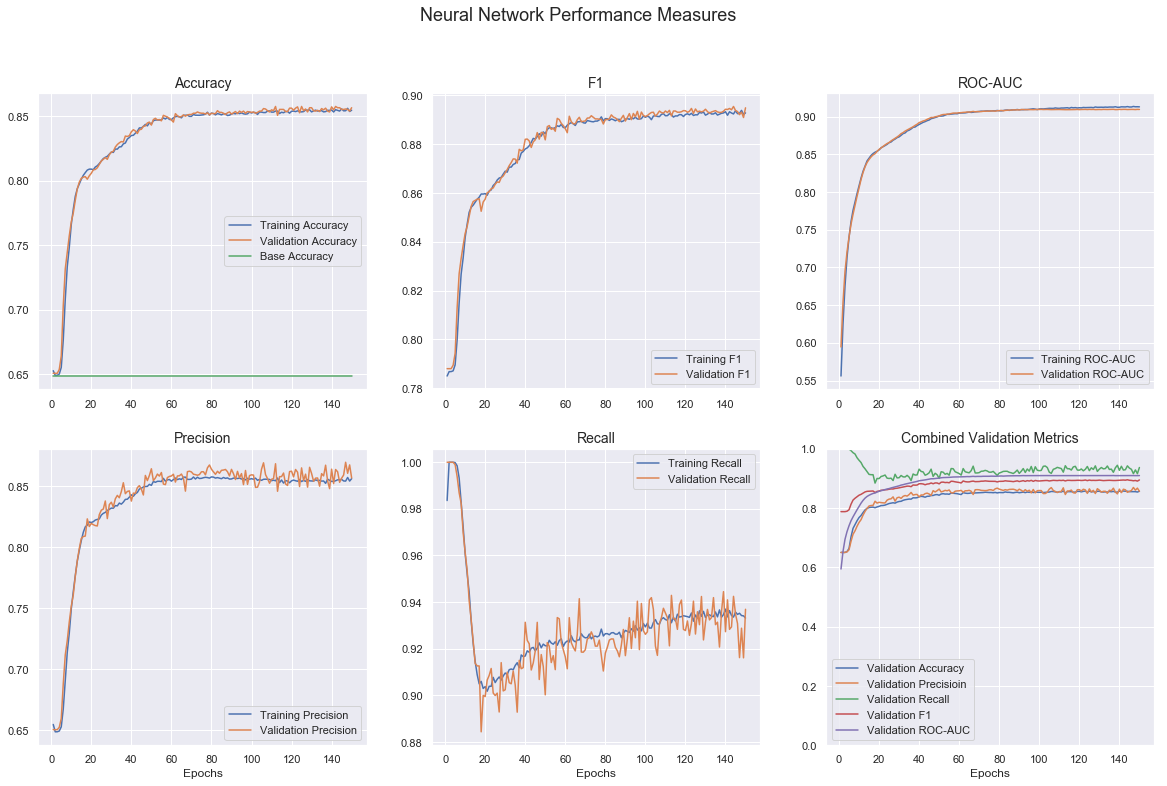

In [507]:
nn_plot()

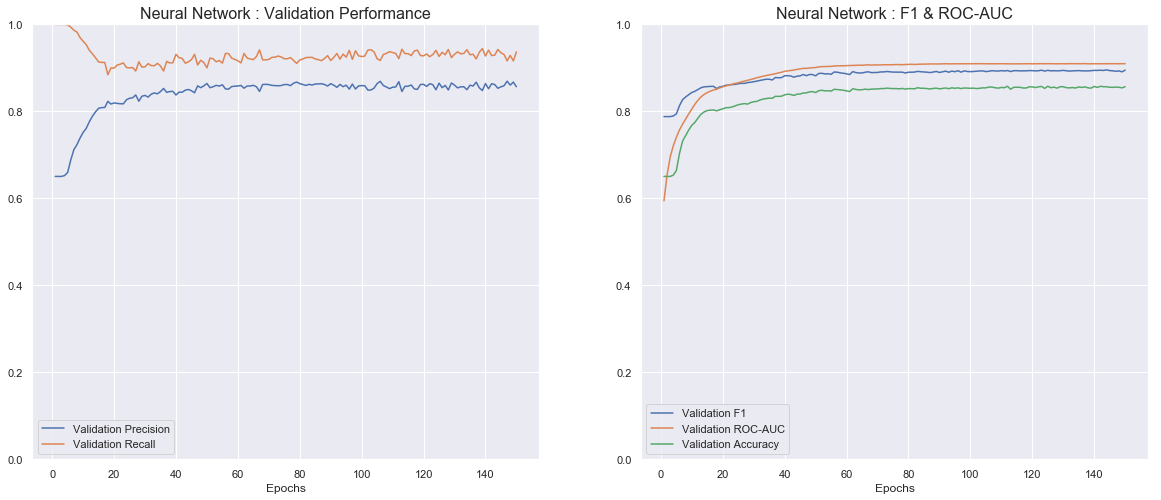

In [508]:
df_plot = pd.DataFrame(history_dict)
df_plot['Epochs'] = epochs
df_plot.index = df_plot['Epochs']
df_plot['Base Accuracy'] = base_accuracy
df_plot['Base ROC-AUC'] = base_roc_auc

fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].plot(df_plot[['val_precision', 'val_recall']])
axs[0].set_xlabel('Epochs')
axs[0].set_title('Neural Network : Validation Performance', fontsize=16)
axs[0].legend(['Validation Precision', 'Validation Recall'])
axs[0].set_ylim(0,1)
axs[1].plot(df_plot[['val_f1', 'val_auroc', 'val_acc']])
axs[1].set_title('Neural Network : F1 & ROC-AUC', fontsize=16)
axs[1].set_xlabel('Epochs')
axs[1].legend(['Validation F1', 'Validation ROC-AUC', 'Validation Accuracy'])
plt.ylim(0,1);

In [509]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(9,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

np.random.seed(42)
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy', precision, recall, f1, auroc])

model.fit(Xk_train, yk_train, epochs=df_plot['val_auroc'].argmax(), batch_size=512)
results = model.evaluate(Xk_test, yk_test)

C:\Users\folli\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  app.launch_new_instance()


Epoch 1/137
15216/15216 [==============================] - 1s 39us/step - loss: 0.6902 - acc: 0.6236 - precision: 0.6877 - recall: 0.7267 - f1: 0.6938 - auroc: 0.6616
Epoch 2/137
15216/15216 [==============================] - 0s 7us/step - loss: 0.6833 - acc: 0.6945 - precision: 0.6914 - recall: 0.9561 - f1: 0.8022 - auroc: 0.7239
Epoch 3/137
15216/15216 [==============================] - 0s 7us/step - loss: 0.6771 - acc: 0.7070 - precision: 0.6938 - recall: 0.9815 - f1: 0.8128 - auroc: 0.7581
Epoch 4/137
15216/15216 [==============================] - 0s 7us/step - loss: 0.6708 - acc: 0.7132 - precision: 0.6986 - recall: 0.9818 - f1: 0.8161 - auroc: 0.7699
Epoch 5/137
15216/15216 [==============================] - 0s 7us/step - loss: 0.6640 - acc: 0.7252 - precision: 0.7093 - recall: 0.9768 - f1: 0.8217 - auroc: 0.7772
Epoch 6/137
15216/15216 [==============================] - 0s 7us/step - loss: 0.6565 - acc: 0.7367 - precision: 0.7197 - recall: 0.9734 - f1: 0.8274 - auroc: 0.7861
Epo

In [510]:
model_scores['KPCA Neural Network'] = results[1:]
model_scores

,Original Neural Network,KPCA Neural Network
Accuracy,0.867771,0.857781
F1,0.860004,0.852371
Precision,0.950247,0.944450
Recall,0.901015,0.894106
ROC-AUC,0.912886,0.907929


In [511]:
yk_pred = model.predict(Xk_test)
model_predictions = np.asarray([round(num[0],0) for num in yk_pred])

cm_df = pd.crosstab(yk_test, model_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
roc = roc_curve(yk_test, yk_pred)

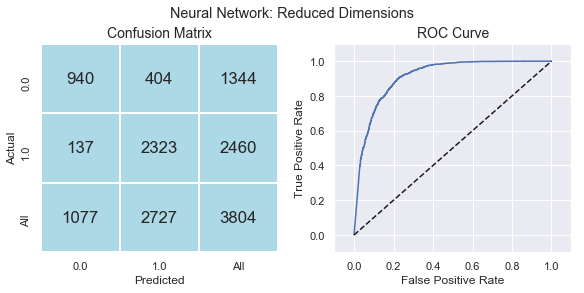

In [512]:
fpr, tpr, thresholds = roc[0], roc[1], roc[2]

from matplotlib.colors import ListedColormap

fig, axs = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)
sns.set(font_scale=1.4)
sns.heatmap(cm_df, annot=True, fmt='g', cmap=ListedColormap(['lightblue']), cbar=False, linewidths=1, ax=axs[0]);
sns.set(font_scale=1)
axs[0].set_title('Confusion Matrix', fontsize=14)
axs[1].plot(fpr, tpr)
axs[1].plot([0,1], [0,1], 'k--')
axs[1].axis([0,1,0,1])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve', fontsize=14)
axs[1].set_xlim(-.1,1.1)
axs[1].set_ylim(-.1,1.1)
fig.suptitle('Neural Network: Reduced Dimensions');

### Neural Network on Reduced Dimensions with Clustering Labels

In [513]:
kmeans_dict = {}
cluster_distances = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(nn_data_kpca)
    kpca_data[f'{k}-means Label'] = kmeans.labels_
    
    plot_df = pd.DataFrame(index=new_rows, columns=[f'Label {k_}' for k_ in range(k)])
    for n in range(k):
        for m in range(len(new_rows)):
            plot_df.iloc[m,n] = kpca_data[kpca_data[f'{k}-means Label'] == n].iloc[:,m+1].mean()
    kmeans_dict[k] = plot_df
    
    cluster_distances.append(np.amin(kmeans.transform(nn_data_kpca), axis=1).sum())

In [514]:
k_distance = pd.DataFrame()
k_distance['Cluster Distances'] = cluster_distances
k_distance['K-means'] = range(2,11)
k_distance

,Cluster Distances,K-means
0,5429.387361,2
1,5045.689051,3
2,4816.448749,4
3,4610.085644,5
4,4468.493670,6
5,4338.879919,7
6,4263.881336,8
7,4192.310172,9
8,4101.466922,10


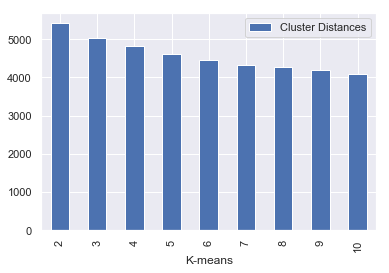

In [515]:
k_distance.plot.bar(x='K-means')

In [516]:
kpca_data.head()

,KPCA 1,KPCA 2,KPCA 3,KPCA 4,KPCA 5,KPCA 6,KPCA 7,KPCA 8,KPCA 9,class,2-means Label,3-means Label,4-means Label,5-means Label,6-means Label,7-means Label,8-means Label,9-means Label,10-means Label
0,-0.121876,0.025239,-0.199097,0.064965,0.040273,-0.021913,0.012142,-0.000909,-0.005536,1.0,1,1,3,1,0,4,0,6,7
1,-0.213534,0.154018,0.096035,0.086035,-0.037495,0.024337,-0.053719,-0.045778,0.019744,1.0,1,0,1,0,4,1,6,1,9
2,0.663702,-0.194266,-0.278129,0.170887,-0.120065,0.249851,-0.030460,-0.069731,-0.114424,1.0,0,2,2,4,3,2,5,8,8
3,-0.343524,0.103172,0.013191,0.061108,0.095253,0.056949,-0.067202,-0.009645,0.017793,1.0,1,0,1,0,4,0,2,1,9
4,0.224485,0.061355,0.205050,-0.123740,-0.120656,0.047638,-0.040537,-0.039341,-0.013670,1.0,0,2,0,3,5,3,7,3,1


In [517]:
kpca_data_ = kpca_data.iloc[:,:9]
kpca_data_.head()

,KPCA 1,KPCA 2,KPCA 3,KPCA 4,KPCA 5,KPCA 6,KPCA 7,KPCA 8,KPCA 9
0,-0.121876,0.025239,-0.199097,0.064965,0.040273,-0.021913,0.012142,-0.000909,-0.005536
1,-0.213534,0.154018,0.096035,0.086035,-0.037495,0.024337,-0.053719,-0.045778,0.019744
2,0.663702,-0.194266,-0.278129,0.170887,-0.120065,0.249851,-0.030460,-0.069731,-0.114424
3,-0.343524,0.103172,0.013191,0.061108,0.095253,0.056949,-0.067202,-0.009645,0.017793
4,0.224485,0.061355,0.205050,-0.123740,-0.120656,0.047638,-0.040537,-0.039341,-0.013670


In [518]:
ex_max = GaussianMixture(n_components=6, random_state=42).fit(nn_data_kpca)
kpca_data_['Ex-Max Label'] = ex_max.predict(nn_data_kpca)
kpca_data_['class'] = y_value
kpca_data_.head()

,KPCA 1,KPCA 2,KPCA 3,KPCA 4,KPCA 5,KPCA 6,KPCA 7,KPCA 8,KPCA 9,Ex-Max Label,class
0,-0.121876,0.025239,-0.199097,0.064965,0.040273,-0.021913,0.012142,-0.000909,-0.005536,5,1.0
1,-0.213534,0.154018,0.096035,0.086035,-0.037495,0.024337,-0.053719,-0.045778,0.019744,0,1.0
2,0.663702,-0.194266,-0.278129,0.170887,-0.120065,0.249851,-0.030460,-0.069731,-0.114424,3,1.0
3,-0.343524,0.103172,0.013191,0.061108,0.095253,0.056949,-0.067202,-0.009645,0.017793,1,1.0
4,0.224485,0.061355,0.205050,-0.123740,-0.120656,0.047638,-0.040537,-0.039341,-0.013670,2,1.0


In [519]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
ex_max_1hot = encoder.fit_transform(np.asarray(kpca_data_['Ex-Max Label']).reshape(-1,1))
ex_max_1hot

C:\Users\folli\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<19020x6 sparse matrix of type '<class 'numpy.float64'>'
	with 19020 stored elements in Compressed Sparse Row format>

In [520]:
nn_data_kpca.shape

(19020, 9)

In [521]:
from scipy import sparse

sp_kpca = sparse.csr_matrix(nn_data_kpca)

In [522]:
new_nn_data = sparse.hstack([sp_kpca, ex_max_1hot])

In [523]:
new_nn_data.shape

(19020, 15)

In [524]:
new_nn_data = new_nn_data.todense()

In [525]:
kl_train, kl_test = train_test_split(new_nn_data, test_size=0.2, random_state=42)
Xkl_train, Xkl_test = np.asarray(kl_train), np.asarray(kl_test)

In [526]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(15,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [527]:
np.random.seed(42)
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy', precision, recall, f1, auroc])

In [528]:
history = model.fit(Xkl_train, 
                   y_train, 
                   epochs=150, 
                   batch_size=512, 
                   validation_split=0.2)

Train on 12172 samples, validate on 3044 samples
Epoch 1/150
12172/12172 [==============================] - 1s 58us/step - loss: 0.6959 - acc: 0.5044 - precision: 0.6018 - recall: 0.5712 - f1: 0.5806 - auroc: 0.4471 - val_loss: 0.6909 - val_acc: 0.5608 - val_precision: 0.6295 - val_recall: 0.7892 - val_f1: 0.7002 - val_auroc: 0.4637
Epoch 2/150
12172/12172 [==============================] - 0s 8us/step - loss: 0.6876 - acc: 0.6378 - precision: 0.6483 - recall: 0.9635 - f1: 0.7744 - auroc: 0.5178 - val_loss: 0.6851 - val_acc: 0.6505 - val_precision: 0.6505 - val_recall: 1.0000 - val_f1: 0.7880 - val_auroc: 0.5346
Epoch 3/150
12172/12172 [==============================] - 0s 8us/step - loss: 0.6833 - acc: 0.6485 - precision: 0.6484 - recall: 1.0000 - f1: 0.7866 - auroc: 0.5744 - val_loss: 0.6814 - val_acc: 0.6505 - val_precision: 0.6505 - val_recall: 1.0000 - val_f1: 0.7880 - val_auroc: 0.5764
Epoch 4/150
12172/12172 [==============================] - 0s 8us/step - loss: 0.6794 - acc: 0.

In [529]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'val_precision', 'val_recall', 'val_f1', 'val_auroc', 'loss', 'acc', 'precision', 'recall', 'f1', 'auroc'])

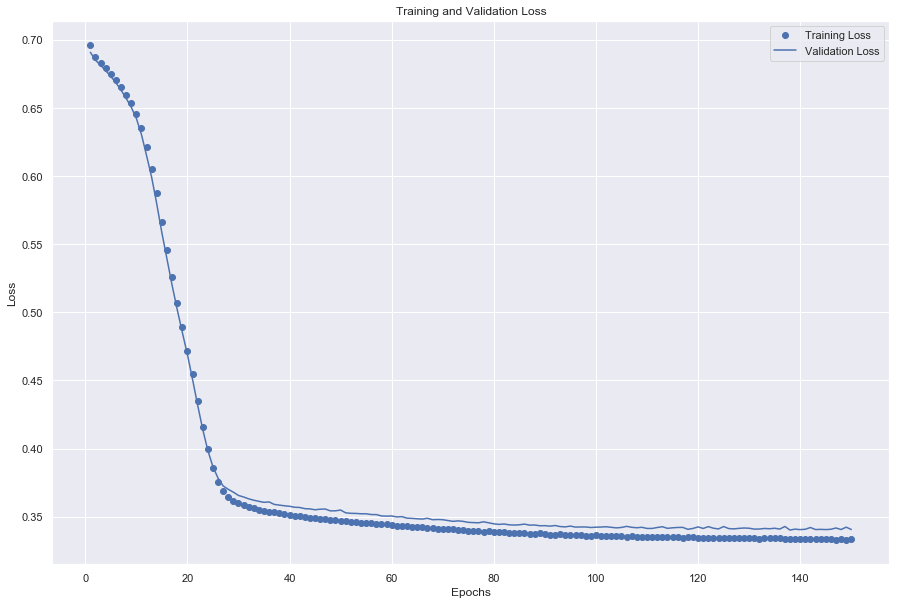

In [530]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,10))
plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

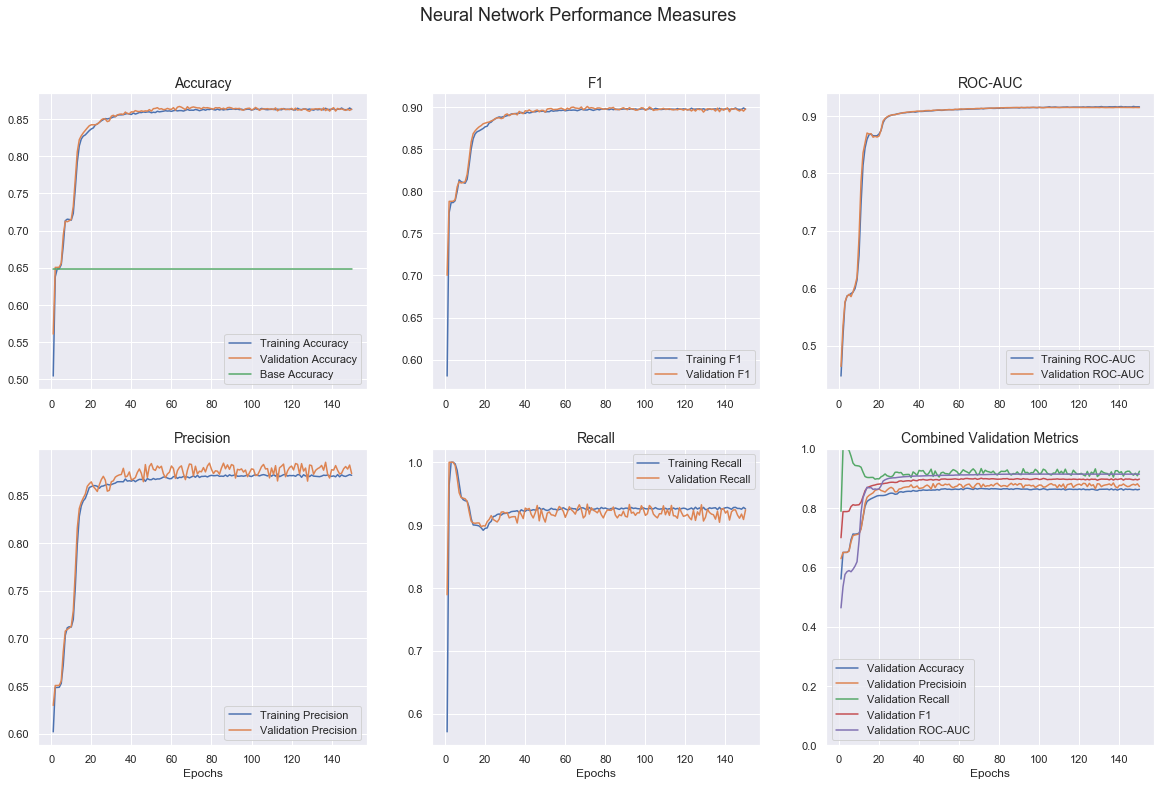

In [531]:
nn_plot()

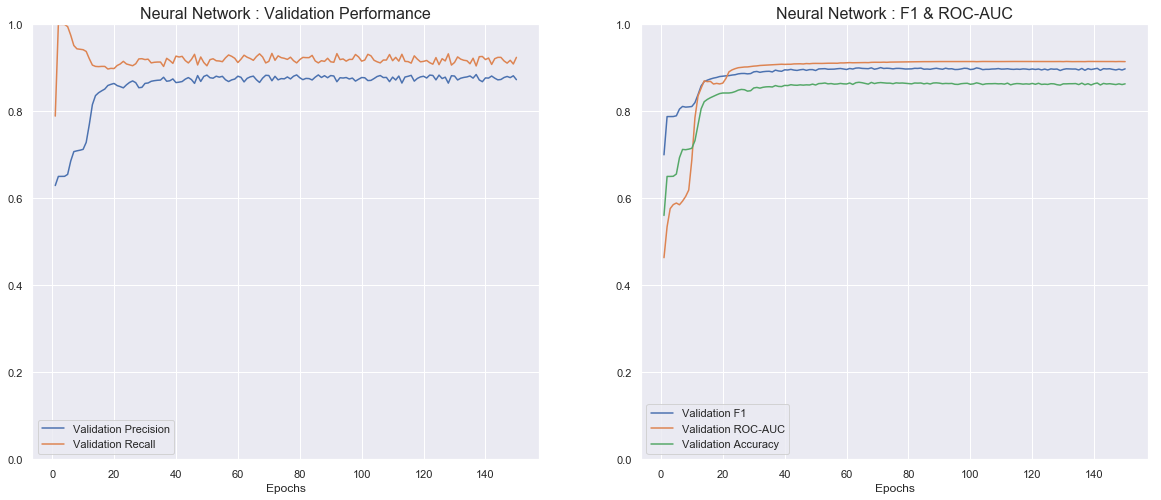

In [532]:
df_plot = pd.DataFrame(history_dict)
df_plot['Epochs'] = epochs
df_plot.index = df_plot['Epochs']
df_plot['Base Accuracy'] = base_accuracy
df_plot['Base ROC-AUC'] = base_roc_auc

fig, axs = plt.subplots(1, 2, figsize=(20,8))

axs[0].plot(df_plot[['val_precision', 'val_recall']])
axs[0].set_xlabel('Epochs')
axs[0].set_title('Neural Network : Validation Performance', fontsize=16)
axs[0].legend(['Validation Precision', 'Validation Recall'])
axs[0].set_ylim(0,1)
axs[1].plot(df_plot[['val_f1', 'val_auroc', 'val_acc']])
axs[1].set_title('Neural Network : F1 & ROC-AUC', fontsize=16)
axs[1].set_xlabel('Epochs')
axs[1].legend(['Validation F1', 'Validation ROC-AUC', 'Validation Accuracy'])
plt.ylim(0,1);

In [533]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(6, activation='relu', input_shape=(15,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(2, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

np.random.seed(42)
model.compile(optimizer='rmsprop', 
             loss='binary_crossentropy', 
             metrics=['accuracy', precision, recall, f1, auroc])

model.fit(Xkl_train, y_train, epochs=df_plot['val_auroc'].argmax(), batch_size=512)
results = model.evaluate(Xkl_test, y_test)

C:\Users\folli\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  app.launch_new_instance()


Epoch 1/131
15216/15216 [==============================] - 1s 43us/step - loss: 0.6934 - acc: 0.5266 - precision: 0.6730 - recall: 0.4251 - f1: 0.5042 - auroc: 0.6437
Epoch 2/131
15216/15216 [==============================] - 0s 7us/step - loss: 0.6837 - acc: 0.6965 - precision: 0.7067 - recall: 0.9097 - f1: 0.7949 - auroc: 0.6488
Epoch 3/131
15216/15216 [==============================] - 0s 7us/step - loss: 0.6765 - acc: 0.7103 - precision: 0.7112 - recall: 0.9319 - f1: 0.8066 - auroc: 0.7178
Epoch 4/131
15216/15216 [==============================] - 0s 7us/step - loss: 0.6664 - acc: 0.7382 - precision: 0.7358 - recall: 0.9309 - f1: 0.8217 - auroc: 0.8312
Epoch 5/131
15216/15216 [==============================] - 0s 7us/step - loss: 0.6545 - acc: 0.8017 - precision: 0.8043 - recall: 0.9185 - f1: 0.8573 - auroc: 0.8466
Epoch 6/131
15216/15216 [==============================] - 0s 8us/step - loss: 0.6391 - acc: 0.8233 - precision: 0.8344 - recall: 0.9080 - f1: 0.8695 - auroc: 0.8386
Epo

In [549]:
model_scores['Clustered KPCA Neural Network'] = results[1:]
model_scores.columns=['Orig. NN', 'KPCA NN', 'Clust KPCA NN']
model_scores

,Orig. NN,KPCA NN,Clust KPCA NN
Accuracy,0.867771,0.857781,0.854890
F1,0.860004,0.852371,0.864362
Precision,0.950247,0.944450,0.918277
Recall,0.901015,0.894106,0.888658
ROC-AUC,0.912886,0.907929,0.897412


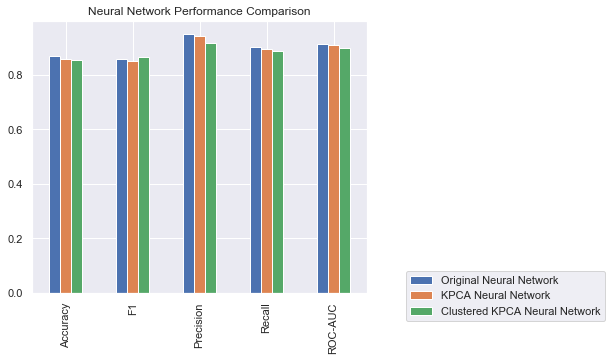

In [553]:
model_scores.columns = ['Original Neural Network', 'KPCA Neural Network', 'Clustered KPCA Neural Network']
fig, ax = plt.subplots(figsize=(6,5))
model_scores.plot.bar(ax=ax)
ax.set_title('Neural Network Performance Comparison')
ax.legend(bbox_to_anchor=(1.1, 0.1));

In [536]:
ykl_pred = model.predict(Xkl_test)
model_predictions = np.asarray([round(num[0],0) for num in ykl_pred])

In [538]:
cm_df = pd.crosstab(yk_test, model_predictions, rownames=['Actual'], colnames=['Predicted'], margins=True)
roc = roc_curve(yk_test, ykl_pred)

fpr, tpr, thresholds = roc[0], roc[1], roc[2]

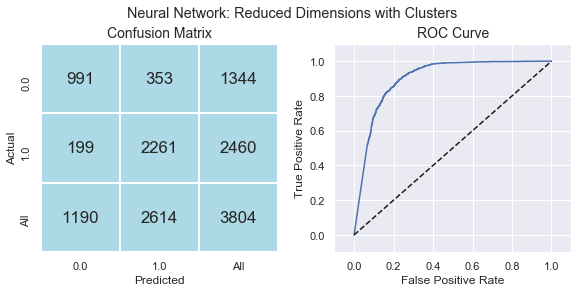

In [554]:
from matplotlib.colors import ListedColormap

fig, axs = plt.subplots(1, 2, figsize=(8,4), constrained_layout=True)
sns.set(font_scale=1.4)
sns.heatmap(cm_df, annot=True, fmt='g', cmap=ListedColormap(['lightblue']), cbar=False, linewidths=1, ax=axs[0]);
sns.set(font_scale=1)
axs[0].set_title('Confusion Matrix', fontsize=14)
axs[1].plot(fpr, tpr)
axs[1].plot([0,1], [0,1], 'k--')
axs[1].axis([0,1,0,1])
axs[1].set_xlabel('False Positive Rate')
axs[1].set_ylabel('True Positive Rate')
axs[1].set_title('ROC Curve', fontsize=14)
axs[1].set_xlim(-.1,1.1)
axs[1].set_ylim(-.1,1.1)
fig.suptitle('Neural Network: Reduced Dimensions with Clusters');